# 1.Project Setup
Libraries:
'pandas', 'numpy' for data manipulation

'matplotlib', 'seaborn' for visualization

'scikit-learn', 'tensorflow', 'keras' for machine learning models

'yfinance' or 'alpha_vantage' for stock data
statsmodels for statistical analysis

# 2. Data Collection
Historical Stock Data: Use 'yfinance' or 'alpha_vantage' APIs to collect historical stock prices, including open, close, high, low, and volume.

Additional Features: Consider adding technical indicators (moving averages, RSI, MACD, etc.), macroeconomic data (interest rates, GDP), or even sentiment analysis from news articles.

In [2]:
import yfinance as yf

# Download data for a specific stock
data = yf.download('AAPL', start='2010-01-01', end='2023-01-01')


[*********************100%%**********************]  1 of 1 completed


# 3. Data Preprocessing
Handling Missing Data: Fill missing values or drop them if appropriate.

Feature Engineering: Create new features like moving averages, RSI, or Bollinger Bands.

Normalization/Scaling: Normalize data to a standard scale to improve model performance.

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['Close']])


# 4. Model Selection
You can experiment with several models to predict stock prices or trends:

Linear Regression: Simple and interpretable.
Random Forest: Handles complex datasets well.
LSTM/GRU: Good for time series prediction.
Reinforcement Learning: For more complex, decision-making-based predictions.

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the number of timesteps
timesteps = 60  # Example value, adjust as needed

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(timesteps, 1)))  # Now using the defined 'timesteps'
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# 5. Training the Model
Train/Test Split: Divide your data into training and testing sets.

Model Training: Train your chosen model(s) on the training data.

Hyperparameter Tuning: Use techniques like GridSearchCV to find the best parameters.

In [9]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# Create feature set (X) and target variable (y)
X = []
y = []
for i in range(timesteps, len(data_scaled)):
    X.append(data_scaled[i-timesteps:i, 0])
    y.append(data_scaled[i, 0])

X, y = np.array(X), np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ... (Rest of your model definition and training code)


# 6. Model Evaluation
Metrics: Evaluate the model using metrics like Mean Squared Error (MSE) for regression or accuracy for classification tasks.

Visualization: Plot predictions against actual values to visualize the model's performance.

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step


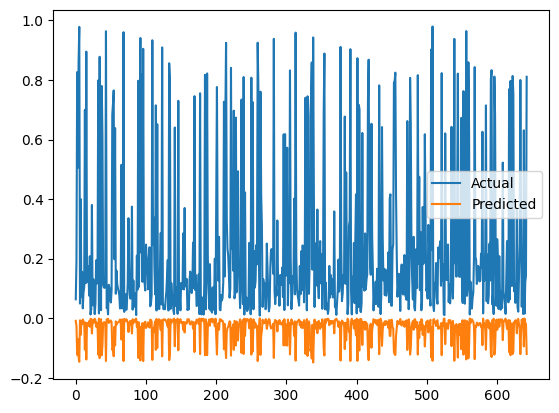

In [10]:
import matplotlib.pyplot as plt

predictions = model.predict(X_test)
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()


In [12]:
!pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 81.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [13]:
import streamlit as st

st.title('Stock Price Predictor')

2024-08-23 17:22:00.616 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [15]:
!streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.148.114.138:8501

  Stopping...
^C
